In [2]:
import caffe
import lmdb
import numpy as np
import matplotlib.pyplot as plt
from caffe.proto import caffe_pb2
from caffe.io import datum_to_array, array_to_datum

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
path="/vol/pfc/data/datasets/Sequence1_lmdb"

lmdb_env = lmdb.open(path)
lmdb_txn = lmdb_env.begin()
lmdb_cursor = lmdb_txn.cursor()
datum = caffe.proto.caffe_pb2.Datum()

In [5]:
model_path="/mnt/model/train_25_batch/train_sequence_1_25_lmdb_iter_35000.caffemodel"
deploy_path="/vol/pfc/prototxt/sequence1/train_sequence_25_lmdb_deploy.prototxt"
caffe.set_mode_cpu()
net = caffe.Net(deploy_path,model_path, caffe.TEST)

In [6]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_mean('data', np.load('/vol/pfc/data/means/Sequence1_mean.npy').mean(1).mean(1))
transformer.set_transpose('data', (2,0,1))

In [18]:
cnt=0
data_array=[]
for key, value in lmdb_cursor:
    datum.ParseFromString(value)
    label = datum.label
    data = caffe.io.datum_to_array(datum)
    print label
    print data.shape
    image= np.transpose(data,(1, 2, 0))
    data_array+=[image]
   # plt.imshow(image)
   # plt.show()
    cnt+=1
    if (cnt>10):
        break
    


4
(3, 320, 240)
2
(3, 320, 240)
1
(3, 320, 240)
6
(3, 320, 240)
1
(3, 320, 240)
1
(3, 320, 240)
4
(3, 320, 240)
1
(3, 320, 240)
1
(3, 320, 240)
7
(3, 320, 240)
2
(3, 320, 240)


In [20]:
print data_array[0].shape
image.shape
image_transform=transformer.preprocess('data', image)
image_transform.shape
print image.shape
len(data_array)

(320, 240, 3)
(320, 240, 3)


11

In [25]:
input_oversampled = caffe.io.oversample([data_array[0]],(310, 230))

In [26]:
print image.shape
input_oversampled.shape

(320, 240, 3)


(10, 310, 230, 3)

(320, 240, 3)


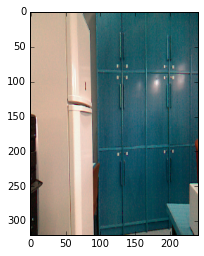

(310, 230, 3)
(230, 3, 310)


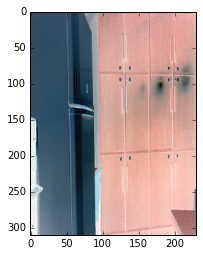

(310, 230, 3)
(230, 3, 310)


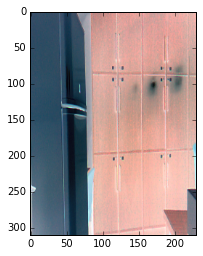

(310, 230, 3)
(230, 3, 310)


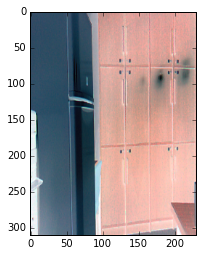

(310, 230, 3)
(230, 3, 310)


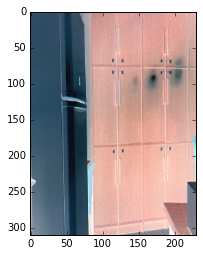

(310, 230, 3)
(230, 3, 310)


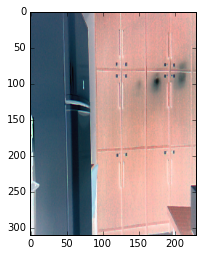

(310, 230, 3)
(230, 3, 310)


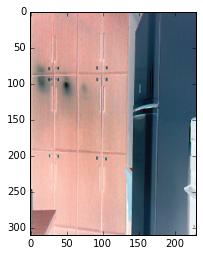

(310, 230, 3)
(230, 3, 310)


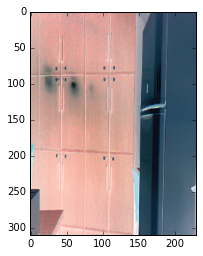

(310, 230, 3)
(230, 3, 310)


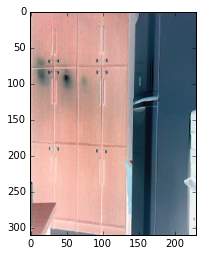

(310, 230, 3)
(230, 3, 310)


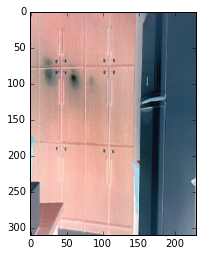

(310, 230, 3)
(230, 3, 310)


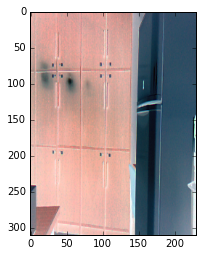

In [27]:
print image.shape
plt.imshow(data_array[0])
plt.show()
input_oversampled
for i in input_oversampled:
    sh_image= np.transpose(i,(1, 2, 0))
    print i.shape
    print sh_image.shape
    plt.imshow(i)
    plt.show()
    


In [36]:

input_oversampled = caffe.io.oversample([data_array],(320, 240))

AttributeError: 'list' object has no attribute 'shape'